In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Statistics for combined data

### Read data

In [8]:
df = pd.read_parquet('./data_IDS2017/combined.parquet')

df.reset_index(drop=True, inplace=True)
print("Shape of combined DataFrame:", df.shape)
df.columns
print(df.head())

Shape of combined DataFrame: (2202993, 12)
   Total Fwd Packets  Total Length of Fwd Packets  Fwd Packet Length Mean  \
0                  2                           12                 6.00000   
1                  2                           12                 6.00000   
2                  2                           12                 6.00000   
3                  2                           12                 6.00000   
4                  7                          484                69.14286   

   Bwd Packet Length Mean  Fwd IAT Total  Bwd Packets/s  Average Packet Size  \
0                     0.0              4         0.0000              9.00000   
1                     0.0              1         0.0000              9.00000   
2                     0.0              3         0.0000              9.00000   
3                     0.0              1         0.0000              9.00000   
4                   103.5            609      6568.1445             81.63636   

   Init_Win_b

Bar plot of every attack type

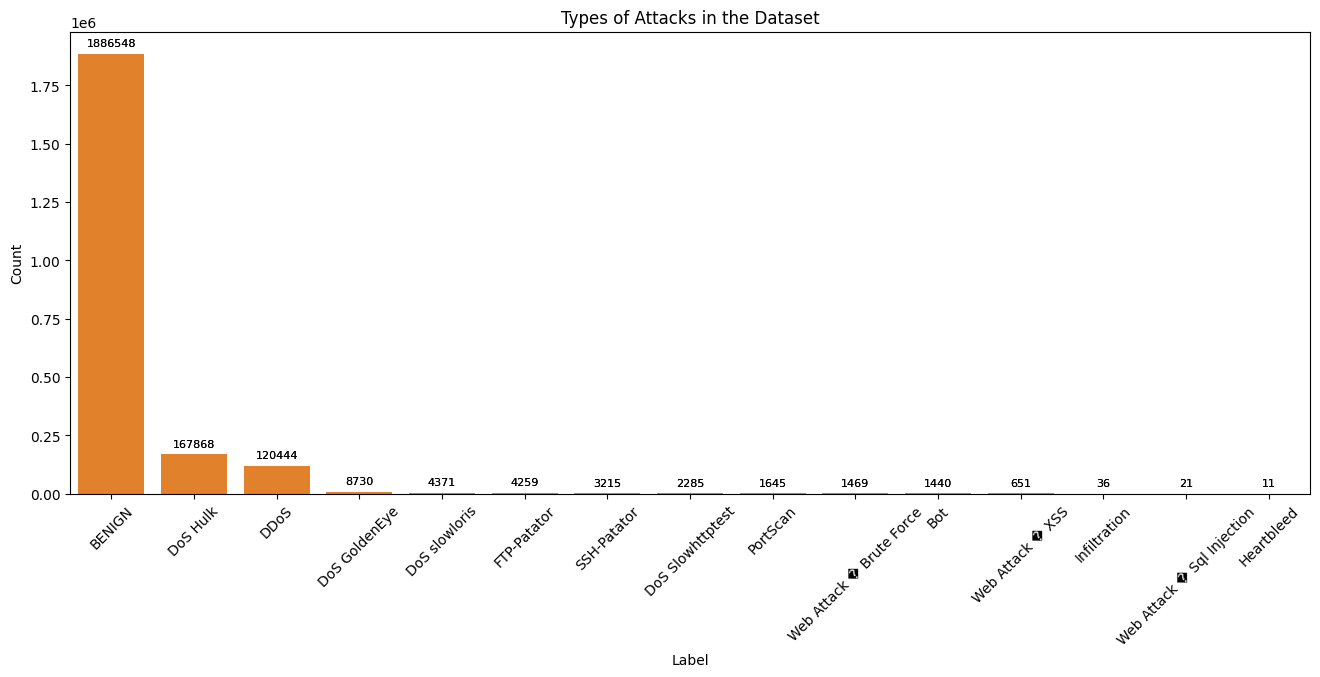

Label
BENIGN                        1886548
DoS Hulk                       167868
DDoS                           120444
DoS GoldenEye                    8730
DoS slowloris                    4371
FTP-Patator                      4259
SSH-Patator                      3215
DoS Slowhttptest                 2285
PortScan                         1645
Web Attack � Brute Force         1469
Bot                              1440
Web Attack � XSS                  651
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [21]:
label_counts = df['Label'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.countplot(x='Label', data=df, order=label_counts.index)
ax = sns.countplot(x='Label', data=df, order=label_counts.index)

plt.title('Types of Attacks in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'baseline', 
        fontsize = 8, 
        color = 'black', 
        xytext = (0, 5), 
        textcoords = 'offset points'
    )

plt.show()
print(label_counts)

Heatmap for columns in dataset

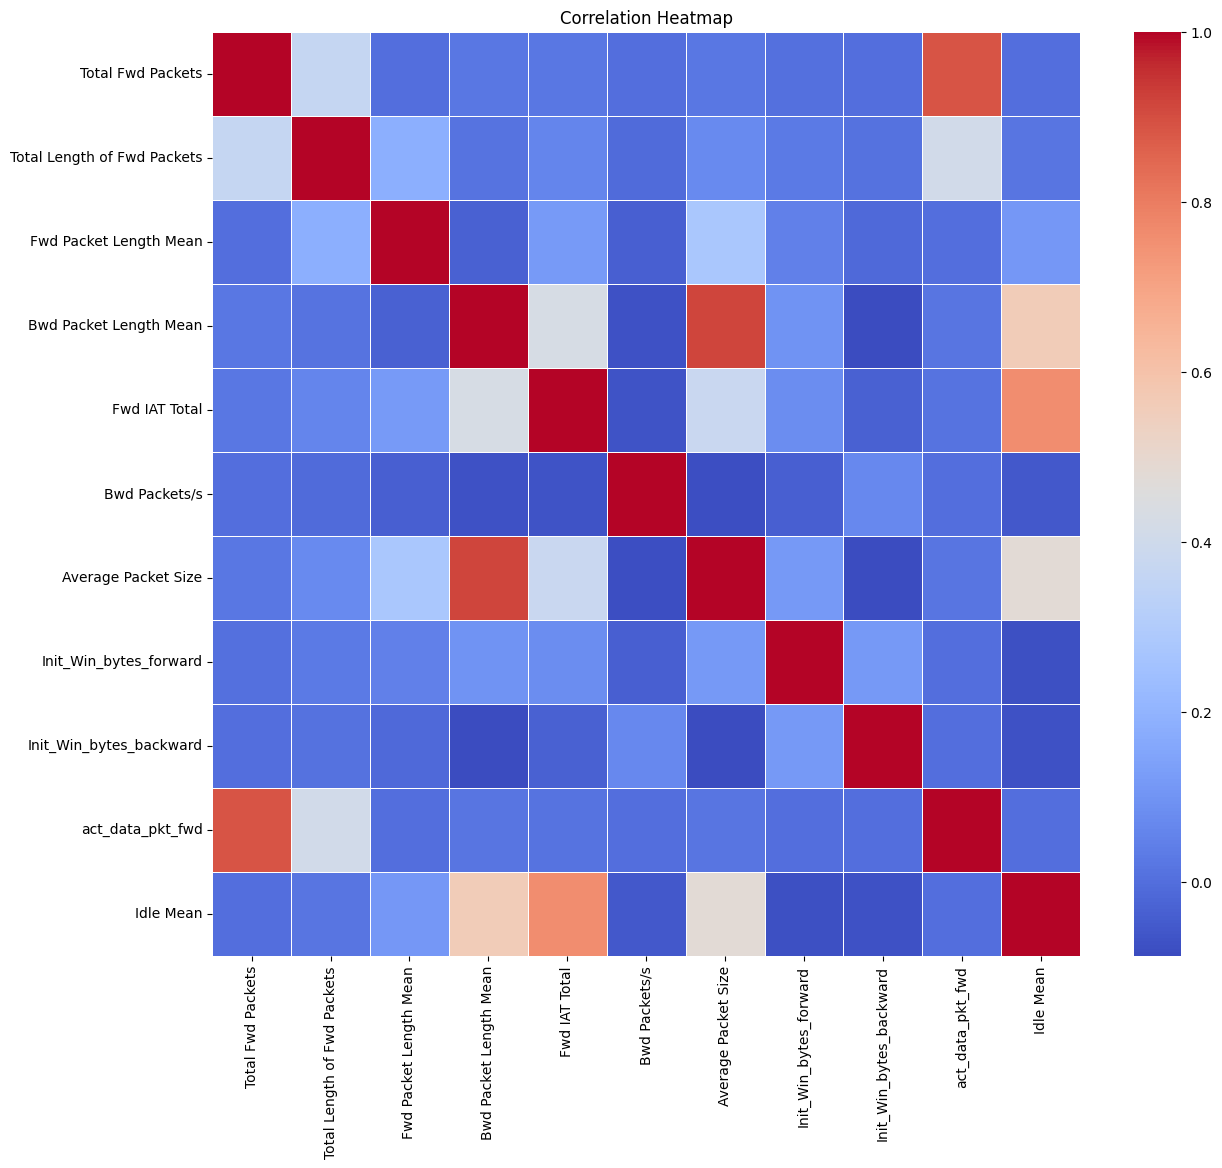

In [29]:
X = df.drop('Label', axis=1)
plt.figure(figsize=(14, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

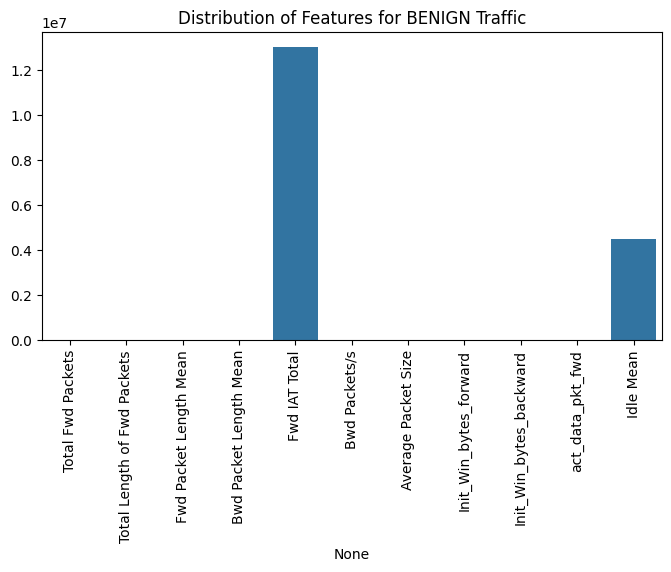

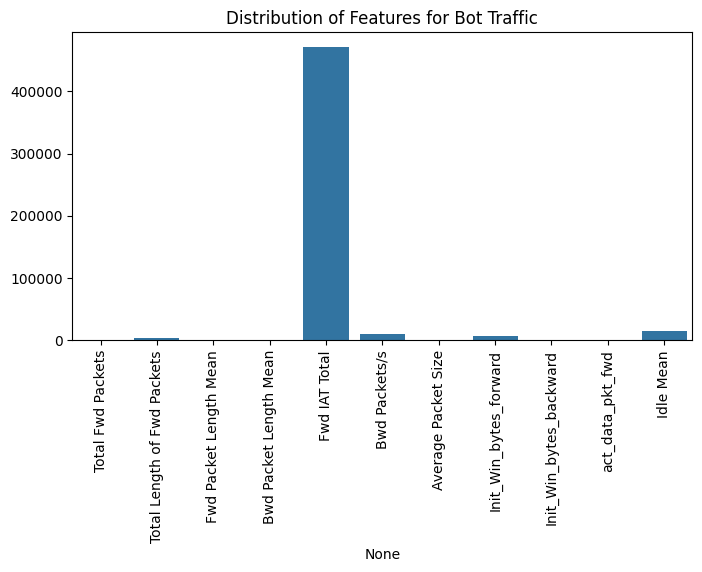

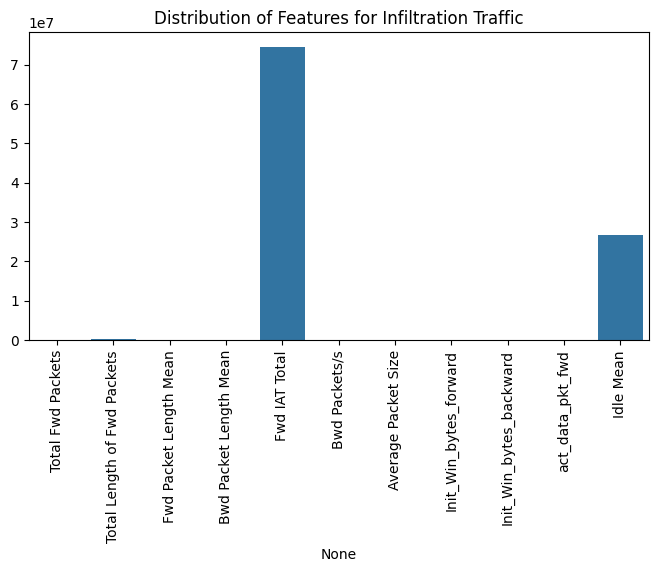

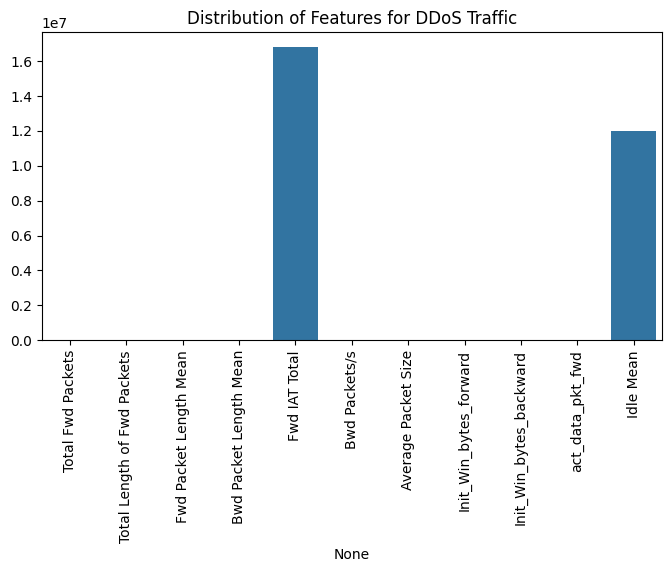

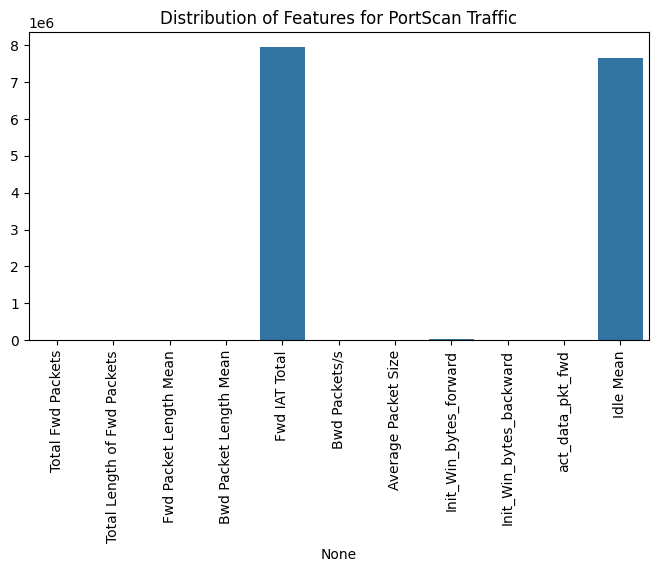

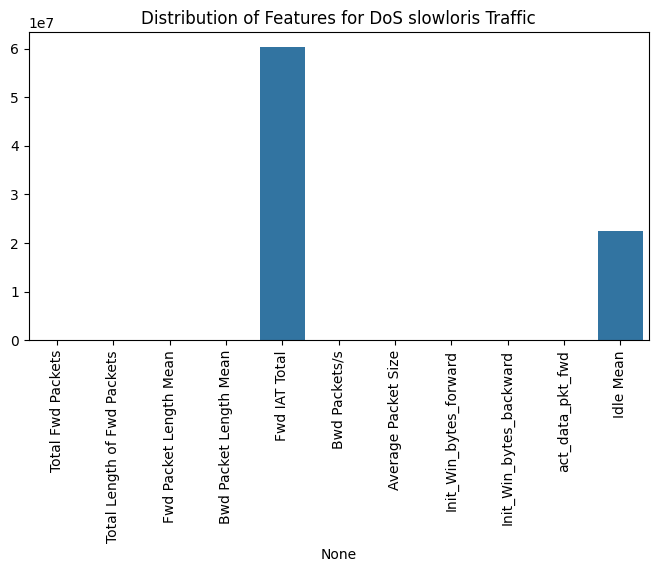

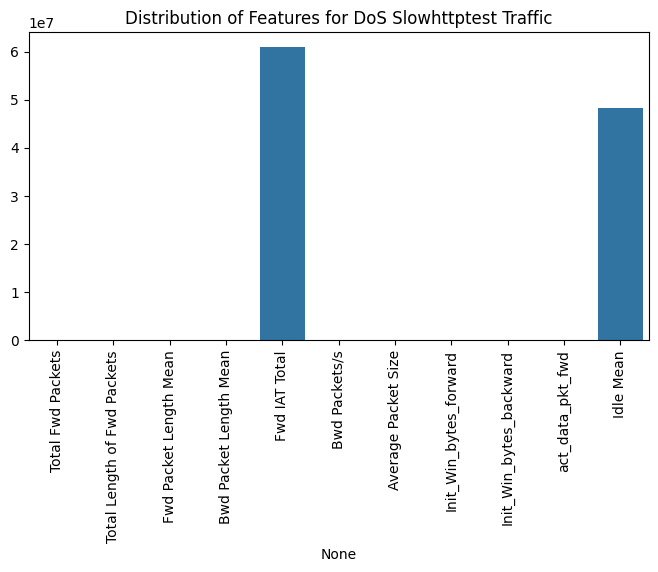

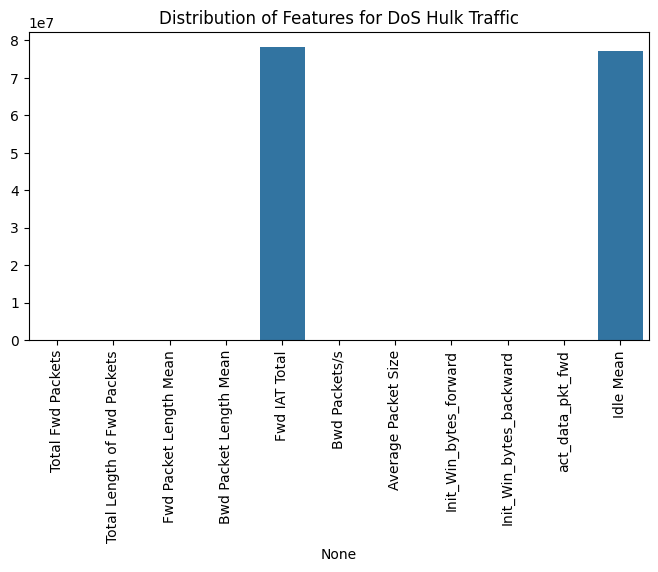

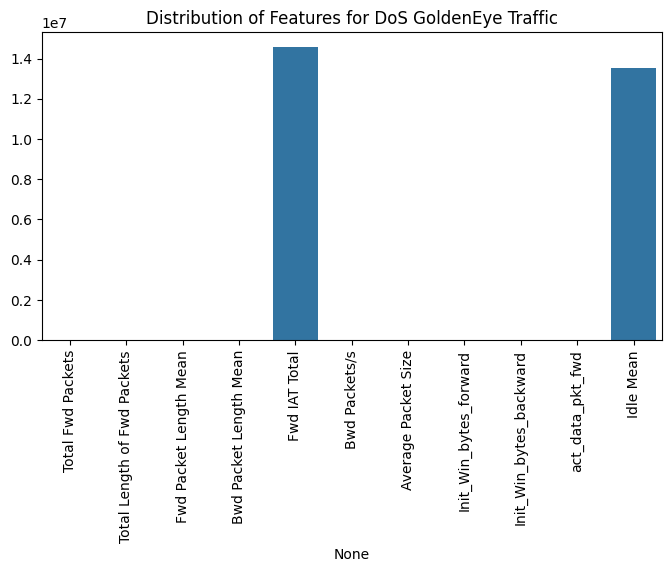

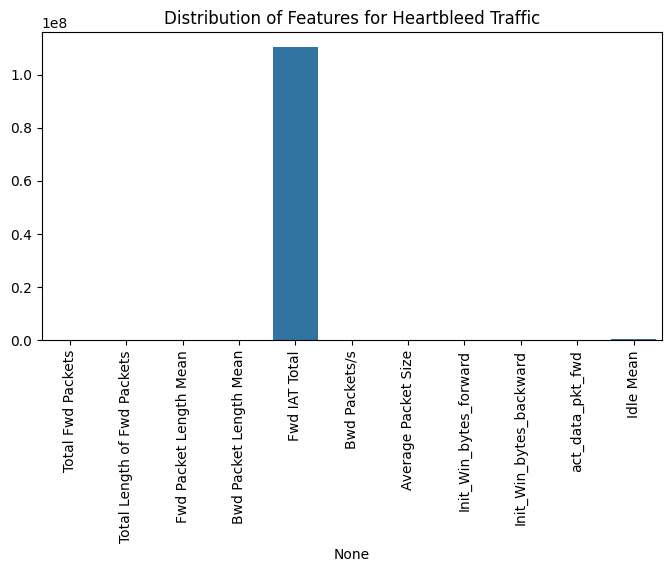

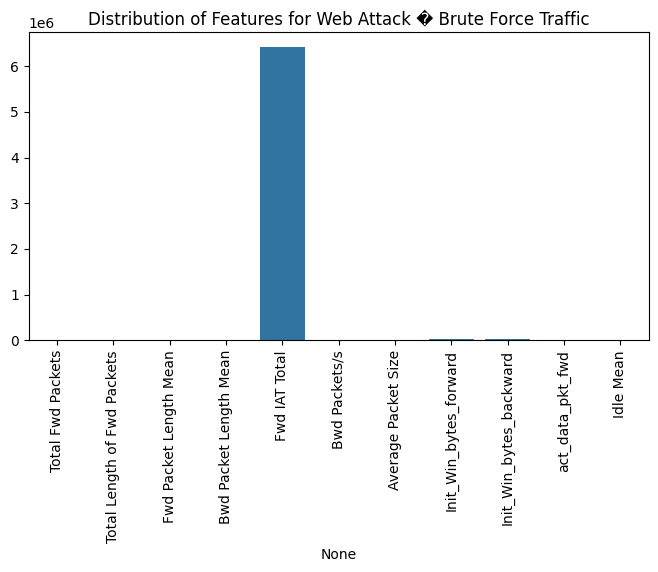

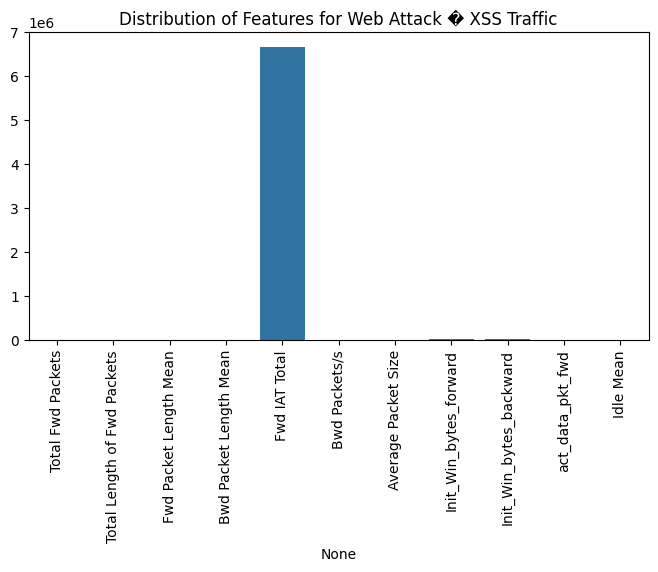

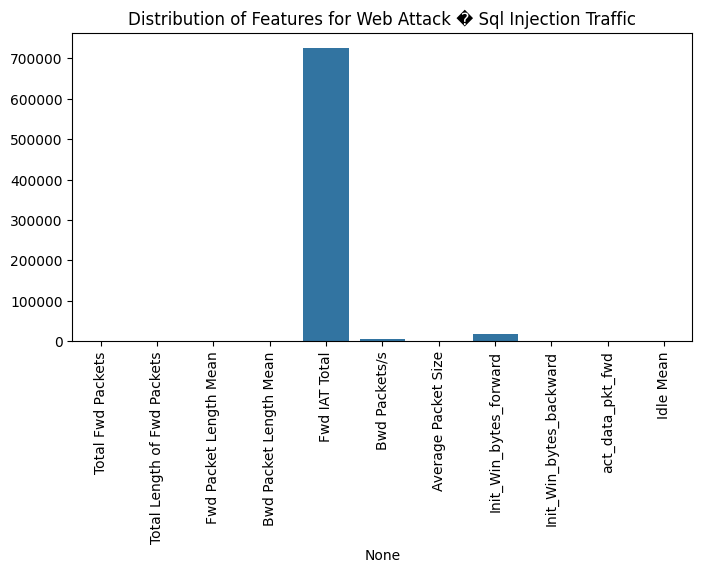

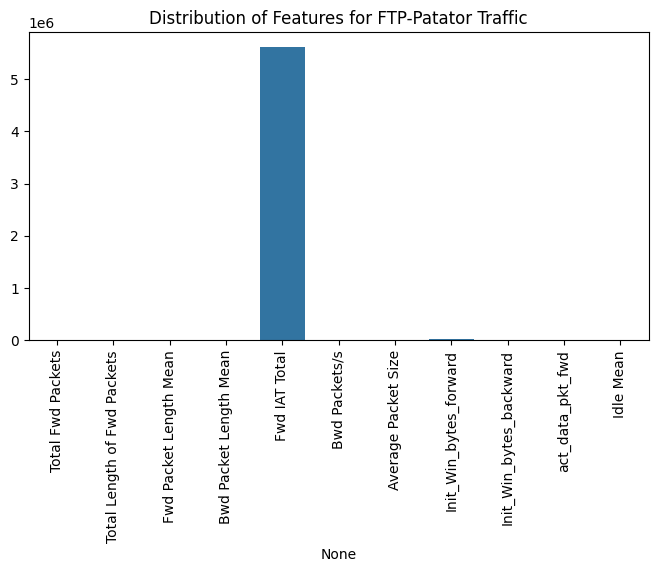

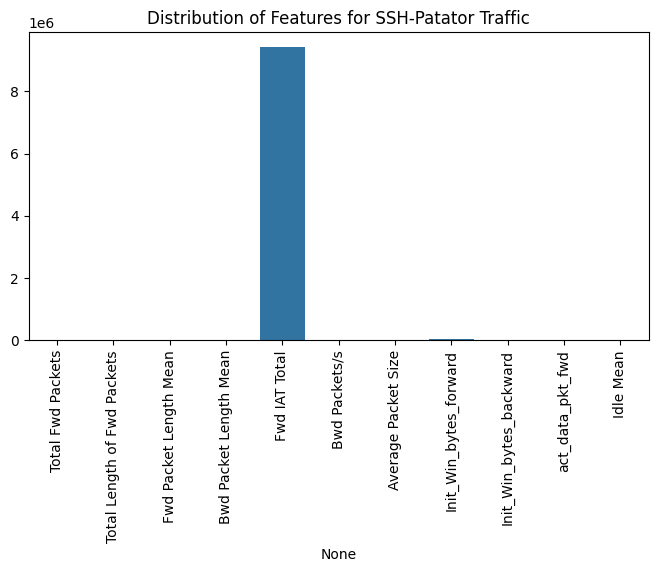

In [28]:
# Przykładowe rozkłady dla różnych ataków
Attack_types = df['Label'].unique()
for attack in Attack_types:
    attack_data = df[df['Label'] == attack]
    attack_data = attack_data.drop(columns=['Label'])
    attack_data = attack_data.mean(numeric_only=True)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=attack_data.index, y=attack_data.values)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of Features for {attack} Traffic')
    plt.show()